In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
import csv
import json
# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [3]:
# reading the csv file
df = pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\FinalProject\healthcare_reviews.csv")

In [4]:
df.head(10)

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
5,The staff was caring and attentive. I couldn't...,4
6,NaN,2
7,I had a bad experience with this healthcare pr...,2
8,I have mixed feelings about my experience.,3
9,I have mixed feelings about my experience.,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
# Basic Statistics of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1000.0,3.058,1.425015,1.0,2.0,3.0,4.0,5.0


In [7]:
# Shape of the dataset
df.shape

(1000, 2)

In [8]:
# Check out sample 'reviewText'
print(df['Review_Text'][1])

The staff was caring and attentive. I couldn't be happier. 


In [9]:
# Checking abnormality on dataset
df.Rating[df['Rating']<1].sum()

0

In [10]:
# Checking abnormality on dataset
df.Rating[df['Rating']>5].sum()

0

# There isn't rating out of defined 1-5 range on 'overall'. Let's see how many customers give ratings for each category.

In [11]:
# Customer totals for each rating
df.Rating.value_counts()

Rating
4    223
5    211
2    209
1    189
3    168
Name: count, dtype: int64

# Heating maps for missing values

(array([0.5, 1.5]), [Text(0.5, 0, 'Review_Text'), Text(1.5, 0, 'Rating')])

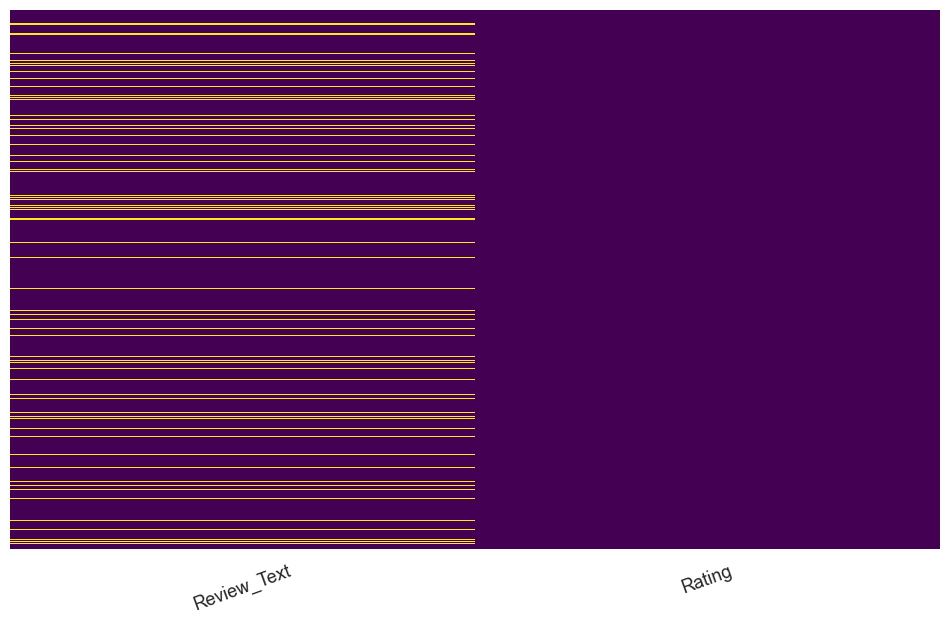

In [12]:
plt.figure(figsize=(12,7))
sns.set()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(fontsize=13,rotation=20)

In [13]:
# # Check for missing values
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

# Filling null values in Review_Text using mode function

In [14]:
df['Review_Text'].fillna(df['Review_Text'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

# Some information about dataset so far:
# This data set includes 1000 entries and 2 columns
# Memory usage is 15.8+ KB.
# In the dataset, we have 2 object, 1 int64 and 1 object data types.
# 100 'Review_Text' information is missing in the dataset. Since customer don't write text always, we should be suspicious 
# about their reviews and ratings. Previously I preferred to drop the missing values from dataset but after more analysis
# I am performing mode operation to fill data because we don't have enough data to perform analysis.
# We should classify the 'Rating'  as good, neutral and bad in order to make sentiment analysis.

In [16]:
# Customer totals for each rating (after drop missing values)
df.Rating.value_counts()

Rating
4    223
5    211
2    209
1    189
3    168
Name: count, dtype: int64

# Classify the 'Rating' as good ,neutral and bad

In [17]:
# Classify ratings as good ,neutral and bad
good_rate    = len (df [df['Rating'] > 3])
neutral_rate = len (df [df['Rating'] == 3])
bad_rate     = len (df [df['Rating'] < 3])

# Printing rates and their total numbers

print ( 'Good ratings    : {} reviwes for health care.'.format(good_rate))
print ( 'Neutral ratings :  {} reviwes for health care .'.format(neutral_rate))
print ( 'Bad ratings     :  {} reviwes for health care.'.format(bad_rate))

Good ratings    : 434 reviwes for health care.
Neutral ratings :  168 reviwes for health care .
Bad ratings     :  398 reviwes for health care.


In [18]:
# Apply the new classification to the Rating column

list_rate_class=[]

for x in df['Rating']:
    
    if x < 3 :
        list_rate_class.append('Bad')
        
    elif x==3 :
        list_rate_class.append('Neutral')
        
    else :
        list_rate_class.append('Good')


df['rating_class'] = list_rate_class

df.head(3)

,Review_Text,Rating,rating_class
0,I have mixed feelings about my experience.,4,Good
1,The staff was caring and attentive. I couldn't...,5,Good
2,I have mixed feelings about my experience.,5,Good


In [19]:
# We have a new column named as 'rating_class' consists of three classes such as 'good, neutral and bad' 
#after applying the new classification.

In [20]:
# Read statistic summary of numeric variables
df.describe()

,Rating
count,1000.000000
mean,3.058000
std,1.425015
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [21]:
# Customer totals for each rating class
df.rating_class.value_counts()

rating_class
Good       434
Bad        398
Neutral    168
Name: count, dtype: int64

In [22]:
# checking the unique values of the all columns only 9 Reviews are unique it means we have huge duplicated values 

for i in df.columns:
    print(i,":",df[i].nunique())

Review_Text : 9
Rating : 5
rating_class : 3


In [35]:
df1=df.copy()

# Removing Special Characters

In [36]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
#from contractions import contractions_dict
import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)
import en_core_web_sm
# spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

In [37]:
def remove_special_characters(text, remove_digits=False):
    
    "Remove special characters/symbols"
    
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [38]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#! pip install spacy

In [39]:
df1.head()

,Review_Text,Rating,rating_class
0,I have mixed feelings about my experience.,4,Good
1,The staff was caring and attentive. I couldn't...,5,Good
2,I have mixed feelings about my experience.,5,Good
3,I have mixed feelings about my experience.,5,Good
4,The healthcare provider was excellent. I had a...,3,Neutral


In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

print(stop_words)


{'a', 'it', 'beforehand', 'via', "'ve", 'whereupon', 'if', 'amount', 'everyone', 'sometime', 'however', 'noone', 'any', 'might', 'while', 'whom', 'thereafter', 'your', 'few', 'toward', 'of', "'ll", 'sixty', 'them', 'with', 'done', '‘ve', 'nobody', 'so', 'anyway', 'or', 'across', 'own', 'an', 'really', 'is', 'side', 'latterly', 'may', 'always', 'thence', 'get', 'some', 'perhaps', 'hence', 'these', 'whenever', 'she', 'never', 'had', "'m", 'he', 'under', 'further', '’ll', 'besides', 'to', 'yours', 'say', 'during', 'its', 'on', 'among', 'into', 'name', 'nor', 'everything', 'someone', 'again', '‘ll', "'s", 'everywhere', 'and', 'only', 'elsewhere', 'our', 'this', 'thru', 'can', 'one', 'fifty', 'my', 'keep', 'ever', 'those', 'become', 'yourself', 'something', 'anything', 'yourselves', 'hundred', 'cannot', '’d', 'without', '‘re', 'are', 'regarding', 'about', 'along', 'nowhere', 'onto', 'though', 'eleven', 'itself', 'otherwise', 'least', 'within', 'per', 'beside', 'before', 'once', 'thereupon',

In [41]:
# Instantiate Tokenizer
tokenizer = ToktokTokenizer()

# Create stopword list
stopword_list = nltk.corpus.stopwords.words('english')

# 'no' and 'not' may give us information so those are removed from stop list
stopword_list.remove('no')
stopword_list.remove('not')
stopword_list.append('I')

In [42]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [43]:
# Lemmatization
# I will remove word affixes to get to the base form of a word, known as root word.

In [44]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [45]:
# Removing stopwords

In [46]:
def remove_stopwords(text, is_lower_case=False):
    
    "Remove stopwords in the text except 'no' and 'not'"
    
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [47]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                                if CONTRACTION_MAP.get(match)\
                                else CONTRACTION_MAP.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# ##REmoving contractionfrom text
# import contractions
# def expand_contractions(text):
#     expanded_text = contractions.fix(text)
#     return expanded_text

In [48]:
# Building a Text Normalizer
# Based on the functions which we have written above and also with additional text correction techniques, we will build a text normalizer in order to help us to preproces the new_text document.

In [49]:
def normalize_corpus(doc, text_lower_case=True,contraction_expansion=True,
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
     
            
    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
            
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        
    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
        
    if contraction_expansion:
        doc = expand_contractions(doc)
            
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  
            
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
        
    # remove ' (apostrophe) sign
    doc = re.sub(r"'", r'', doc)
        
    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
    return doc

# Creating 'clean_text' column from "review_text" by using text normalizer

In [50]:
# Create a new column for cleaned text 
df1['clean_text'] = list(map(lambda doc: normalize_corpus(doc),df1['Review_Text']))

In [51]:
# Creating 'clues' column from the clean_text by using tokenizer

In [52]:
# create a new column named as clues  from 'clean_text' by applying tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df1["clues"] = df1["clean_text"].apply(tokenizer.tokenize)
df1.head(10)

,Review_Text,Rating,rating_class,clean_text,clues
0,I have mixed feelings about my experience.,4,Good,mixed feeling experience,"[mixed, feeling, experience]"
1,The staff was caring and attentive. I couldn't...,5,Good,staff care attentive could not happy,"[staff, care, attentive, could, not, happy]"
2,I have mixed feelings about my experience.,5,Good,mixed feeling experience,"[mixed, feeling, experience]"
3,I have mixed feelings about my experience.,5,Good,mixed feeling experience,"[mixed, feeling, experience]"
4,The healthcare provider was excellent. I had a...,3,Neutral,healthcare provider excellent great experience,"[healthcare, provider, excellent, great, exper..."
5,The staff was caring and attentive. I couldn't...,4,Good,staff care attentive could not happy,"[staff, care, attentive, could, not, happy]"
6,I'm very satisfied with the service I received...,2,Bad,satisfied service receive highly recommend,"[satisfied, service, receive, highly, recommend]"
7,I had a bad experience with this healthcare pr...,2,Bad,bad experience healthcare provider avoid possible,"[bad, experience, healthcare, provider, avoid,..."
8,I have mixed feelings about my experience.,3,Neutral,mixed feeling experience,"[mixed, feeling, experience]"
9,I have mixed feelings about my experience.,5,Good,mixed feeling experience,"[mixed, feeling, experience]"


In [53]:
df1["clues"]

0                           [mixed, feeling, experience]
1            [staff, care, attentive, could, not, happy]
2                           [mixed, feeling, experience]
3                           [mixed, feeling, experience]
4      [healthcare, provider, excellent, great, exper...
                             ...                        
995    [experience, terrible, would, not, recommend, ...
996            [service, disappointing, not, come, back]
997                [service, okay, nothing, exceptional]
998                         [mixed, feeling, experience]
999          [staff, care, attentive, could, not, happy]
Name: clues, Length: 1000, dtype: object

In [54]:
# Tokens status
all_words = [word for tokens in df1["clues"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df1["clues"]]
vocabulary = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocabulary)))
print("Max review length is (word based) %s" % max(sentence_lengths))
print("Min review length is (word based) %s" % min(sentence_lengths))

5004 words total, with a vocabulary size of 32
Max review length is (word based) 6
Min review length is (word based) 3


In [55]:
df1.to_csv('C:/Users/Dell/JupyterPythoncodes/FinalProject/cleaned_health_reviews.csv', sep = ',', encoding = 'utf-8', index = False)

In [23]:
#converted dataframe to cleaned_health_reviews.csv